# Linear Regression

Suppose that we have the following linear hypothesis funtion:
$$
h_\theta(x)=\theta_{0}+\theta_{1}x_{1}+...+\theta_{n}x_{n}$$

Suppose $x_0=1$, we can rewrite the function as:

$$h_\theta(x)=\sum_{i=0}^{n}\theta_ix_i=\theta^Tx$$

with $x=\begin{bmatrix}x_0\\x_1\\...\\x_n\end{bmatrix}$ and $\theta=\begin{bmatrix}\theta_0\\ \theta_1 \\...\\\theta_n\end{bmatrix}$

## Loss function
Suppose that we have m sample $x_j$ with $j={1,2...m}$.

We define the following loss function as a function of $\theta$:

$$L(\theta)=\sum_{j=1}^m(h_\theta(x_j)-y_j)^2$$
We will find $\theta^*$ such that $L(\theta^*)$ is smallest:
$$\theta^*=arg{min}_\theta L(\theta)$$

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load data
data = np.loadtxt("/content/drive/MyDrive/Practical Deep Learning/Day_4 : Linear Regression/Linear_Regression.txt")

### Split data into training data and testing data

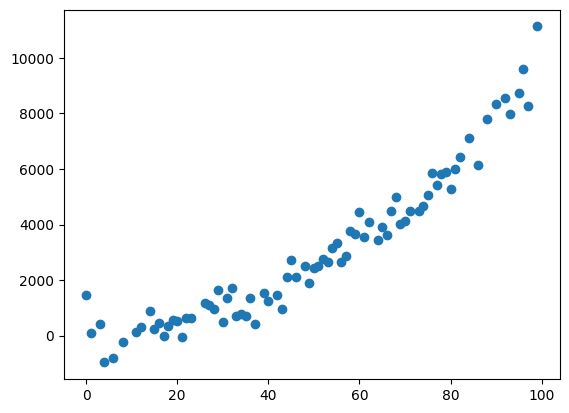

In [ ]:
shuffle = np.random.permutation(data.shape[0])

portion = int(0.2 * len(data))

#split into train and validation data
test_x = data[shuffle[:portion], 0].reshape(-1, 1)
test_y = data[shuffle[:portion], 1].reshape(-1, 1)

train_x = data[shuffle[portion:], 0].reshape(-1, 1)
train_y = data[shuffle[portion:], 1].reshape(-1, 1)

# Plot training data
plt.scatter(train_x, train_y)
plt.show()

In [ ]:
train_y = train_y/10000
test_y = test_y/10000
train_x = train_x/100
test_x = test_x/100

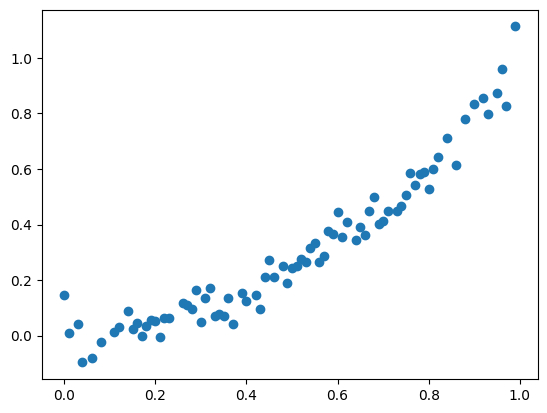

In [ ]:
# Plot training data
plt.scatter(train_x, train_y)
plt.show()

In [ ]:
#pad x with 1 at the beginning
def pad(x):
    x2 = x**2
    x_pad = np.hstack((np.ones((x.shape[0], 1), dtype = x.dtype), x))
    return np.concatenate((x_pad, x2), axis=1)

def predict(theta, x):
    # YOUR CODE HERE
    y_hat = np.dot(pad(x), theta)
    return y_hat
    pass

def compute_gradient(theta, x, y):
    # Return gradient and loss
    # YOUR CODE HERE
    grad = np.dot(pad(x).T, (predict(theta, x) - y)) / (len(y))
    loss = np.sum((predict(theta, x) - y)**2) / (2*len(y))
    return grad, loss
    pass

### Training

Iteration: 100 - Error: 0.0604
Iteration: 200 - Error: 0.0533
Iteration: 300 - Error: 0.0476
Iteration: 400 - Error: 0.0428
Iteration: 500 - Error: 0.0385
Iteration: 600 - Error: 0.0346
Iteration: 700 - Error: 0.0312
Iteration: 800 - Error: 0.0281
Iteration: 900 - Error: 0.0253
Iteration: 1000 - Error: 0.0229
Iteration: 1100 - Error: 0.0206
Iteration: 1200 - Error: 0.0187
Iteration: 1300 - Error: 0.0169
Iteration: 1400 - Error: 0.0153
Iteration: 1500 - Error: 0.0138
Iteration: 1600 - Error: 0.0125
Iteration: 1700 - Error: 0.0114
Iteration: 1800 - Error: 0.0104
Iteration: 1900 - Error: 0.0094
Iteration: 2000 - Error: 0.0086
Iteration: 2100 - Error: 0.0078
Iteration: 2200 - Error: 0.0072
Iteration: 2300 - Error: 0.0066
Iteration: 2400 - Error: 0.0060
Iteration: 2500 - Error: 0.0056
Iteration: 2600 - Error: 0.0051
Iteration: 2700 - Error: 0.0047
Iteration: 2800 - Error: 0.0044
Iteration: 2900 - Error: 0.0041
Iteration: 3000 - Error: 0.0038
Iteration: 3100 - Error: 0.0036
Iteration: 3200 -

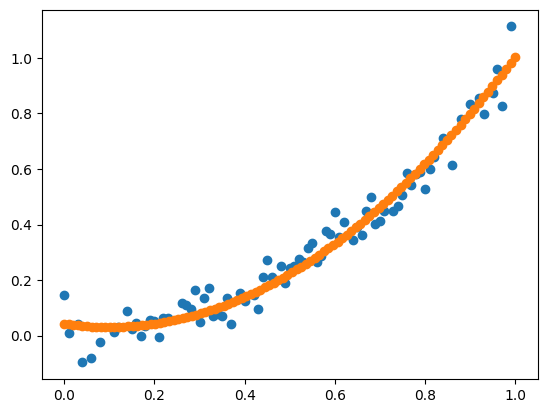

In [ ]:
theta = np.random.randn(3).reshape(3,1)

alpha = 0.005
tolerance = 1e-5

# Perform Gradient Descent
iterations = 1
while True:
    # Compute gradient, error and update theta
    # YOUR CODE HERE
    gradient, error = compute_gradient(theta, train_x, train_y)
    new_theta = theta - alpha * gradient
    pass
    # ----------------------------------------

    # Stopping Condition
    if np.sum(abs(new_theta - theta)) < tolerance or iterations > 10000:
        print("Converged.")
        break

    # Print error every 100 iterations
    if iterations % 100 == 0:
        print("Iteration: %d - Error: %.4f" %(iterations, error))

    iterations += 1
    theta = new_theta

# line_x = np.array([0, 100]).reshape([2,1])
line_x = np.linspace(0, 1, 100).reshape(-1, 1)
line_y = predict(theta, line_x)


plt.plot(train_x, train_y, 'o')
plt.plot(line_x, line_y, marker = 'o')

plt.show()

### Validation

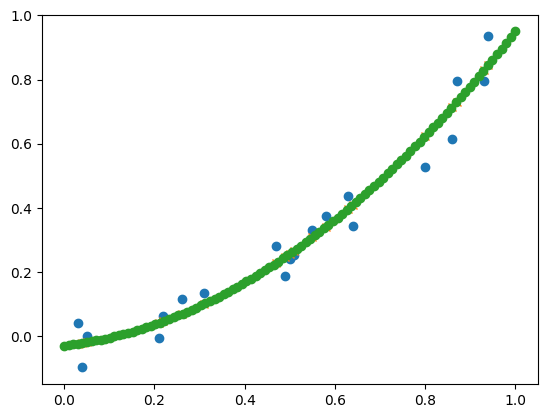

In [ ]:
# Predict
# YOUR CODE HERE
test_y_hat = predict(theta, test_x)
# -----------------------------------------

plt.plot(test_x, test_y, 'o')
plt.plot(test_x, test_y_hat, 'x')
plt.plot(line_x, line_y, marker = 'o')
plt.show()